In [173]:
%matplotlib inline

In [174]:
import numpy as np               # linear algebra
import pandas as pd              #data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # visualization
import seaborn as sns            # 
import warnings
warnings.filterwarnings('ignore')

# Course Project

# Name: Nikolay Nikolaev

# Argument

# Abstract
 TODO

# 1.Read the Dataset

ATTRIBUTE INFORMATION:

Thirteen (13) clinical features:
- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

In [176]:
file_path = "datasets/heart_failure_clinical_records_dataset.csv"
raw_data = pd.read_csv(file_path)
raw_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [177]:
rows, cols = raw_data.shape
print(f"Thare are: {rows}-rows and {cols}-columns.")

Thare are: 299-rows and 13-columns.


# 2.Inspect and fill misssing data

In [202]:
# Checking information of data set
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
death_event                 299 non-null int64
dtypes: float64(3), int64(11)
memory usage: 32.8 KB


In [217]:
raw_data['death_event'] = raw_data['DEATH_EVENT'] 
raw_data.drop(['DEATH_EVENT'], axis=1, inplace=True)

In [218]:
# make finction to explare how many missing values thare are 
def definition_missing_data(data_set):
    for column in data_set.columns:
        null_values = data_set[column].isnull().sum()
        total_values = data_set.shape[0]
        percent = (null_values/ total_values)*100
        print(f"In {column} column {percent:.2f} % values are null")
        
definition_missing_data(raw_data)

In age column 0.00 % values are null
In anaemia column 0.00 % values are null
In creatinine_phosphokinase column 0.00 % values are null
In diabetes column 0.00 % values are null
In ejection_fraction column 0.00 % values are null
In high_blood_pressure column 0.00 % values are null
In platelets column 0.00 % values are null
In serum_creatinine column 0.00 % values are null
In serum_sodium column 0.00 % values are null
In sex column 0.00 % values are null
In smoking column 0.00 % values are null
In time column 0.00 % values are null
In death_event column 0.00 % values are null


In [205]:
# Gread. DOn't have null values

In [181]:
# All columns have numerical value

In [182]:
columns = list(raw_data.columns)
columns = [col.lower() for col in columns]
columns

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'death_event']

# 3.Removing unnecessary columns

In [184]:
all_ages = raw_data['age']
num_patient_by_sex = raw_data.groupby('sex').size()

# 4.Explore the data: single variables

In [222]:
raw_data.death_event.value_counts()

0    203
1     94
Name: death_event, dtype: int64

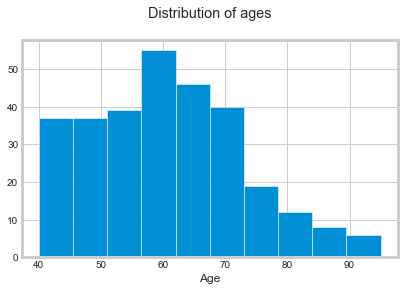

In [194]:
plt.hist(all_ages, bins=10)
plt.title('Distribution of ages\n')
plt.xlabel('Age')
plt.show()

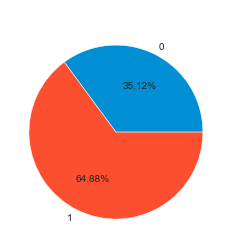

In [196]:
plt.gca().set_aspect('equal')
plt.pie(num_patient_by_sex, labels=num_patient_by_sex.index, autopct="%.2f%%")
plt.title('Patient per sex', color='white')
plt.show()

In [255]:
raw_data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death_event'],
      dtype='object')

In [ ]:
numerical_vars = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death_event']
for v in numerical_vars:
    

# 5.Explore correlations in the dataset and Feature Selection

In [241]:
raw_data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
age,1.000000,0.090548,-0.077188,-0.099528,0.066653,0.087244,-0.052568,0.157286,-0.040453,0.063986,0.020382,-0.222761,0.252800
anaemia,0.090548,1.000000,-0.187867,-0.017789,0.027224,0.040275,-0.043848,0.052940,0.037292,-0.090851,-0.111787,-0.152633,0.075532
creatinine_phosphokinase,-0.077188,-0.187867,1.000000,0.013147,-0.048811,-0.058164,0.027172,-0.010307,0.070536,0.068076,0.022052,0.035003,0.029014
diabetes,-0.099528,-0.017789,0.013147,1.000000,-0.009297,-0.011024,0.092465,-0.046526,-0.094841,-0.154184,-0.151707,0.024777,0.006418
ejection_fraction,0.066653,0.027224,-0.048811,-0.009297,1.000000,0.031647,0.072550,-0.008837,0.169487,-0.145414,-0.071269,0.033724,-0.263993
high_blood_pressure,0.087244,0.040275,-0.058164,-0.011024,0.031647,1.000000,0.050088,-0.007900,0.043953,-0.106781,-0.054573,-0.195458,0.077156
platelets,-0.052568,-0.043848,0.027172,0.092465,0.072550,0.050088,1.000000,-0.041248,0.062449,-0.125391,0.028319,0.010701,-0.049575
serum_creatinine,0.157286,0.052940,-0.010307,-0.046526,-0.008837,-0.007900,-0.041248,1.000000,-0.187582,0.006476,-0.026996,-0.149565,0.295541
serum_sodium,-0.040453,0.037292,0.070536,-0.094841,0.169487,0.043953,0.062449,-0.187582,1.000000,-0.023622,0.001007,0.079629,-0.189218
sex,0.063986,-0.090851,0.068076,-0.154184,-0.145414,-0.106781,-0.125391,0.006476,-0.023622,1.000000,0.450838,-0.007681,-0.011625


In [244]:
correlation_values = raw_data.corr()

In [243]:
top_corre_features = correlation_values.index

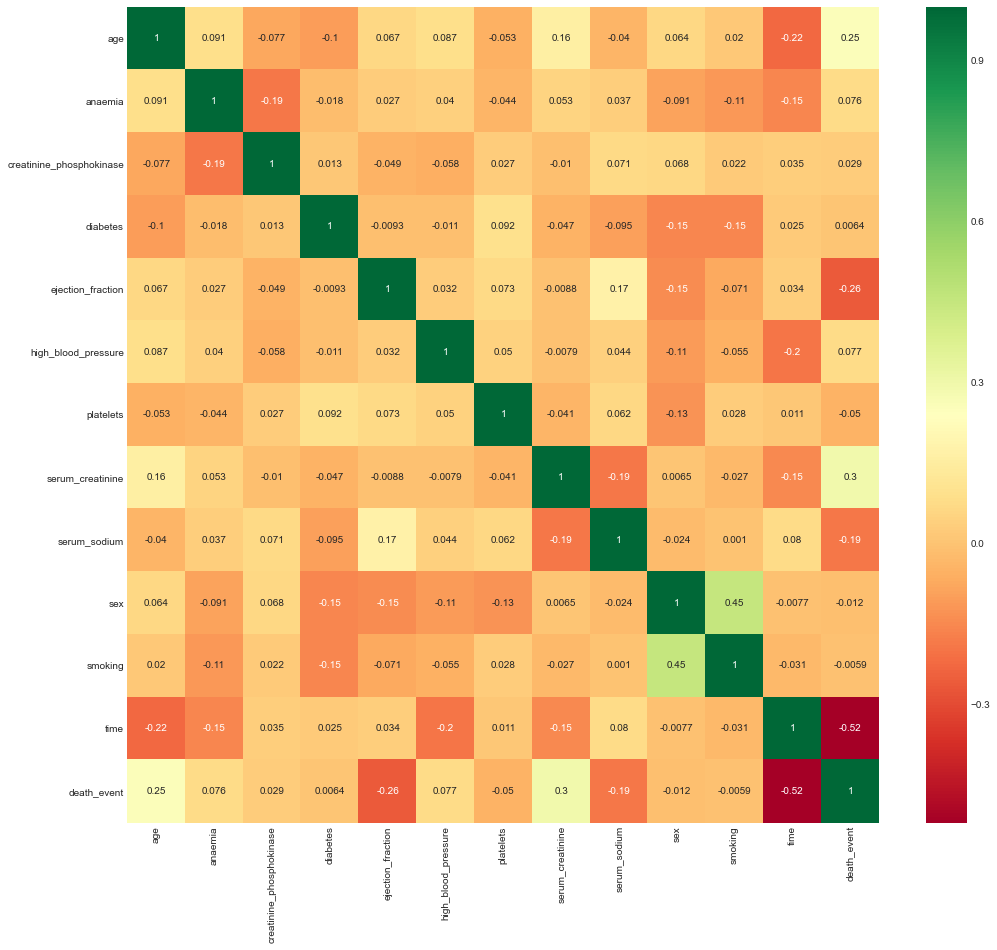

In [247]:
plt.figure(figsize=(15,15))
#plot heat map
g = sns.heatmap(raw_data[top_correlation_features].corr(), annot=True, cmap='RdYlGn')
plt.show()

In [224]:
death_patient = raw_data[raw_data['death_event'] == 0].groupby('sex').size()

In [225]:
death_patient

sex
0     71
1    132
dtype: int64

In [228]:
#print("Death men: {} / {}, {:.2f}%".format(death_patient."1", num_patient_by_sex."1", death_patient.1 / num_patient_by_sex."1" * 100))
#print("Death women: {} / {}, {:.2f}%".format(death_patient.0, num_patient_by_sex.0, death_patient.0 / num_patient_by_sex.0 * 100))

<AxesSubplot:xlabel='smoking', ylabel='count'>

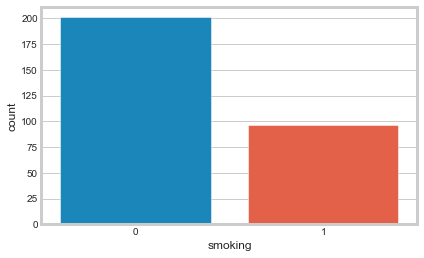

In [233]:
# ........
#ages_by_smoking = raw_data.groupby('smoking')['age']
sns.countplot(x= 'smoking', data=raw_data)

In [ ]:
for passenger_class, ages in ages_by_class:
    plt.hist(ages, label = "Class {}".format(passenger_class), alpha = 0.7)
plt.title("Distribution of passenger ages per class")
plt.legend()
plt.show()

# 6.Perform hypothesis testing on smoking vs diabets vs high blod presure

In [ ]:
# to see about men and women
#third_class_ages = ages_by_class.get_group(3)
women_
ttes

What is hypothesis?

What is hypotehsis testing?

The "null hypothesis" (\H_0)

In [ ]:
test_result = ttest_ind(first_class_ages, third_class_ages, equal_var = False)
### END SOLUTION
print(test_result.pvalue)
if test_result.pvalue <= 0.01:
    print("The differences in age are significant. Reject H0.")
else:
    print("There's not enough evidence to reject H0. Don't accept or reject anything else.")

# 7.Prepare the data for modelling: indicator varibles

In [248]:
raw_data.sample()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
157,50.0,0,250,0,25,0,262000.0,1.0,136,1,1,120,0


In [ ]:
#titanic_data_for_modelling = pd.get_dummies(titanic_data, columns = ["Class", "Sex", "Embarked"])

In [253]:
raw_data_modelling = pd.get_dummies(raw_data, columns=['diabetes', 
                                                       'high_blood_pressure', 
                                                       'sex'])



In [254]:
raw_data_modelling

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1,death_event_0,death_event_1
2,65.0,146,20,162000.0,1.3,129,7,1,0,1,0,1,0,0,1,0,1,0,1
3,50.0,111,20,210000.0,1.9,137,7,0,1,1,0,1,0,0,1,1,0,0,1
4,65.0,160,20,327000.0,2.7,116,8,0,1,0,1,1,0,1,0,1,0,0,1
5,90.0,47,40,204000.0,2.1,132,8,0,1,1,0,0,1,0,1,0,1,0,1
6,75.0,246,15,127000.0,1.2,137,10,0,1,1,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,61,38,155000.0,1.1,143,270,1,0,0,1,0,1,0,1,0,1,1,0
295,55.0,1820,38,270000.0,1.2,139,271,1,0,1,0,1,0,1,0,1,0,1,0
296,45.0,2060,60,742000.0,0.8,138,278,1,0,0,1,1,0,1,0,1,0,1,0
297,45.0,2413,38,140000.0,1.4,140,280,1,0,1,0,1,0,0,1,0,1,1,0


# 8.Prepare the data for modelling: normalization

# 9.Split the data

In [238]:
# 10.Model the data

# 11.Score the model